In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
mnist_train = dset.MNIST("",train=True,transform = transforms.ToTensor(),
                         target_transform=None, download=True)
mnist_test = dset.MNIST("",train=False,transform = transforms.ToTensor(),
                         target_transform=None, download=True)

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label: 5


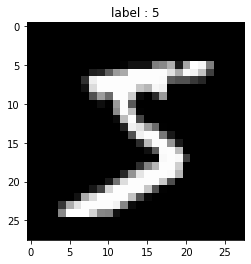

In [5]:
print("mnist_train 길이:", len(mnist_train))
print("mnist_test 길이:",len(mnist_test))
      
#데이터 하나 형태
image, label = mnist_train.__getitem__(0) # 0번째 데이터
print ("image data 형태:",image.size())
print("label:",label)

#그리기
img = image.numpy() # image 타입을 numpy로 변환 (1,26,26)
plt.title('label : %d' %label)
plt.imshow(img[0],cmap='gray')
plt.show()

In [6]:
batch_size=1024
learning_rate=0.01
num_epoch=400

In [7]:
train_loader = torch.utils.data.DataLoader(mnist_train,
                                          batch_size=batch_size, # mnist_train를 트레인 시키자.
                                          shuffle=True, num_workers=2,
                                          drop_last=True) # batch_size만큼 나눌때 나머지는 버려라

test_loader = torch.utils.data.DataLoader(mnist_test,
                                          batch_size=batch_size, # mnist_train를 트레인 시키자.
                                          shuffle=True, num_workers=2,
                                          drop_last=True) # batch_size만큼 나눌때 나머지는 버려라

[0]
한번에 로드되는 데이터 크기: 1024


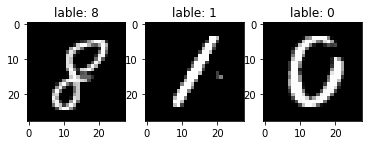

[1]
한번에 로드되는 데이터 크기: 1024


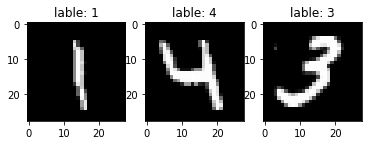

[2]
한번에 로드되는 데이터 크기: 1024


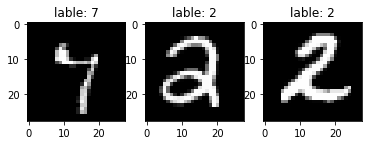

[3]
한번에 로드되는 데이터 크기: 1024


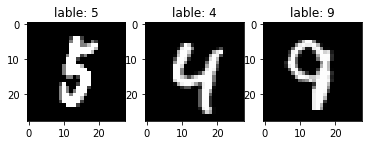

[4]
한번에 로드되는 데이터 크기: 1024


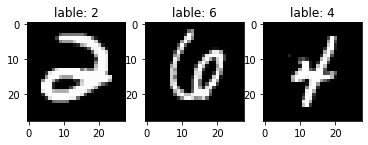

[5]
한번에 로드되는 데이터 크기: 1024


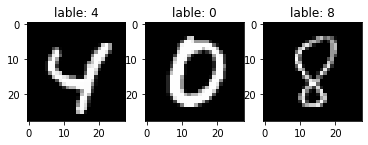

In [8]:
n=3 # 샘플로 그려볼 데이터 개수
for i, [imgs, labels] in enumerate(test_loader): # batch_size만큼
    if i>5:
        break
    print("[%d]" %i)
    print("한번에 로드되는 데이터 크기:",len(imgs))
    
    #그리기
    
    for j in range(n):
        img = imgs[j].numpy() # image 타입을 numpy로 변환 (1,28,28)
        img = img.reshape((img.shape[1],img.shape[2])) # (1,28,28) -> (28,28)
        #print img.shape
        
        plt.subplot(1,n,j+1) # (1,3) 형태의 플랏의 j번째 자리에 그리겠다
        plt.imshow(img, cmap='gray')
        plt.title('lable: %d'%labels[j])
    plt.show()

In [10]:
# 모델 선언
# 퍼셉트론(2 hidden layer)

model = nn.Sequential(
    nn.Linear(28*28,256),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Linear(128,10),
)
#파라미터 보기
#print(list(model.parameters()))

In [13]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs, labels] in enumerate(dloader): # batch_szie 만큼
        img = imgs # x
        label = Variable(labels) # y
        #label = Variable(labels).cuda()
        # .cuda() : GPU에 로드되기 위함. 만약 GPU로 설정되어 있다면 에러남
        
        #(batch_size, 1, 28, 28)-> (batch_size,28,28)
        img = img.reshape((img.shape[0],img.shape[2],img.shape[3]))
        img = img.reshape((img.shape[0],img.shape[1]*img.shape[2]))
        img = Variable(img, requires_grad = False)
        #img = Variable(img, requires_grad = False).cuda()
        
        output = imodel(img)
        _, output_index = torch.max(output,1)
        
        total+=label.size(0)
        correct += (output_index == label).sum().float()
    print('Accuracu of Test Data: {}'.format(100*correct/total))

In [14]:
ComputeAccr(test_loader,model)

Accuracu of Test Data: 8.040364265441895


In [15]:
loss_func = nn.CrossEntropyLoss() #logit(# of classes), target(1)

optimizer = optim.SGD(model.parameters(),lr=learning_rate)